<a href="https://colab.research.google.com/github/NVishnevskaya/phys/blob/summer_practice_trial/task_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [476]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

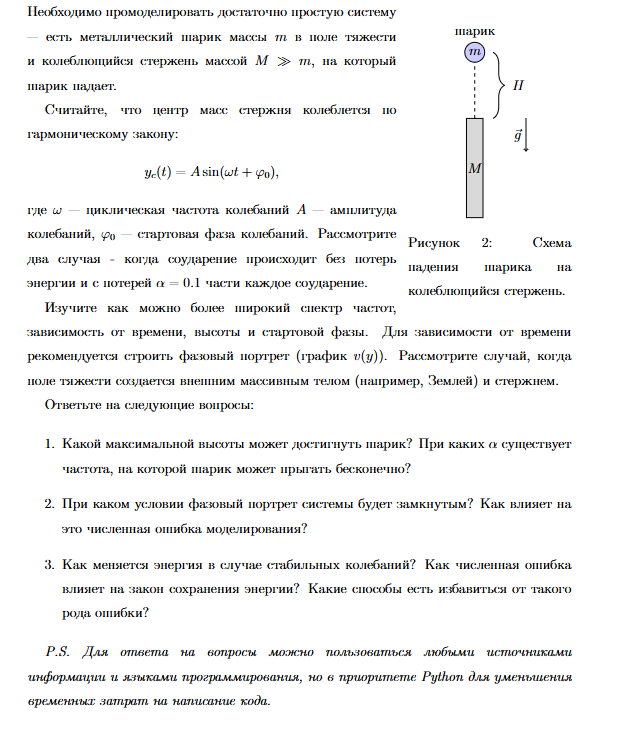

Равноускоренное движения для шара без столкновений

In [477]:
def move_ball_with_acc(y0, V0, acc, time):
    cur_size = time.size
    v_ball = np.full(cur_size, V0)
    v_ball = V0 - acc * time
    y_ball = y0 + V0 * time - acc * time ** 2 / 2
    return y_ball, v_ball

Здесь система отсчета

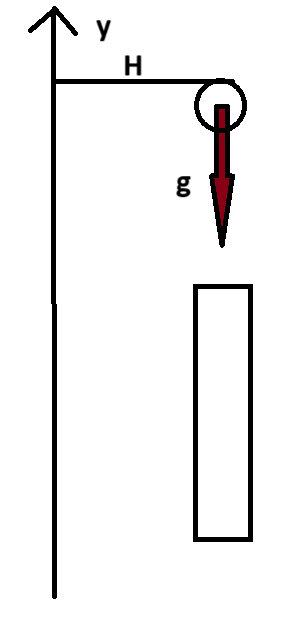

In [478]:
dt = 1e-1
total_time = 10
time = np.arange(0, total_time + dt, dt)

H = 100
v0 = 0
acc = 10.0
y_b, v_b = move_ball_with_acc(H, 0, 10, time)

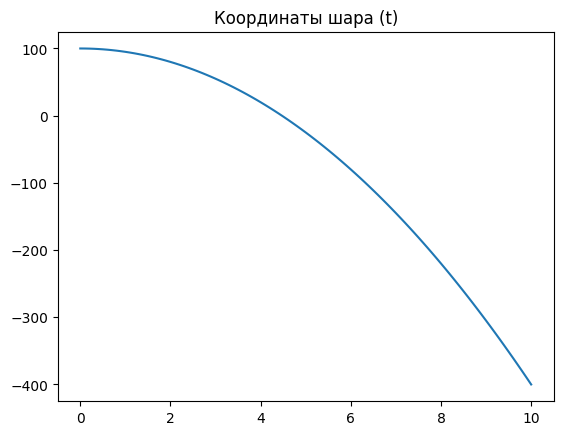

In [479]:
plt.title("Координаты шара (t)")
plt.plot(time, y_b)

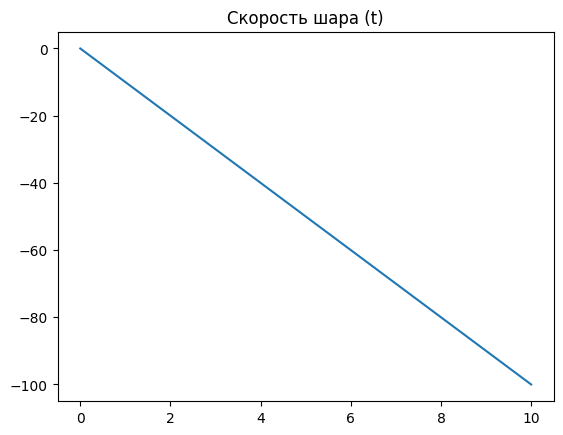

In [480]:
plt.title("Скорость шара (t)")
plt.plot(time, v_b)

Часть с ускорением построена нормально, теперь нужно посмотреть, как движется стержень

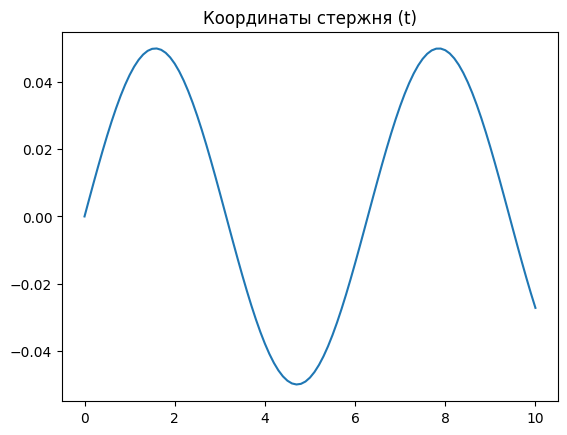

In [481]:
omega = 1
phi0 = 0
A = 0.05
y_p = A * np.sin(omega * time + phi0)
plt.title("Координаты стержня (t)")
plt.plot(time, y_p)

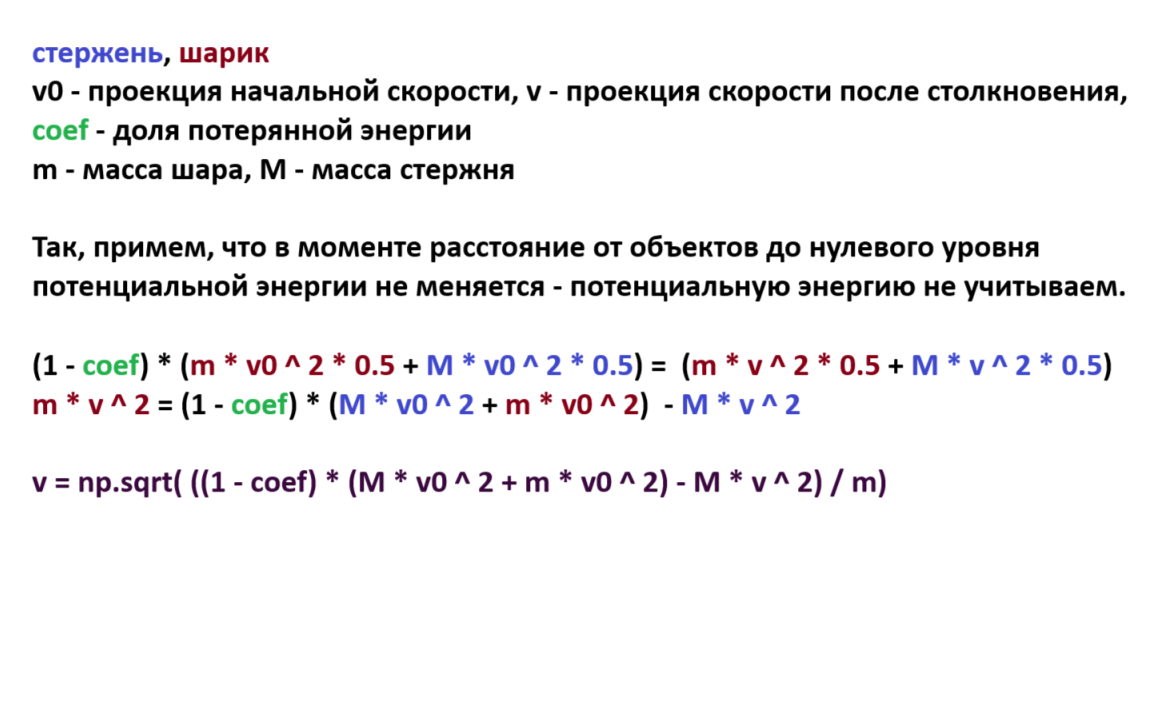

Теперь объединю все расчеты в цикл

In [482]:
def model_system(y0_ball, y0_pivot, g_acc, A0, omega, phi0, total_time=5, dt=1e-1, m=0.01, M=10, coef=0.1):
    # начальные условия
    print(f"-> Начальное положение шара: {y0_ball} м, начальное положение стержня: {y0_pivot} м")
    print(f"-> Временной промежуток от 0 до {total_time} секунд с шагом {dt} секунд")
    print(f"-> g = {g_acc} м / c ^ 2, масса стержня: {M} кг, а шарика - {m} кг")
    print(f"-> Доля потерянной энергии: {coef}")
    # временной массив
    time = np.arange(0, total_time + dt, dt)
    # координаты шара
    y_ball = []
    cur_y_ball = y0_ball
    # скорость шара
    vel_ball = []
    cur_vel_ball = 0
    # стержень
    y_pivot = A0 * np.sin(omega * time + phi0)
    # скорость - производная по координатам (взаимодействие с шариком не влияет, так как M >> m)
    vel_pivot = A0 * np.cos(omega * time + phi0)
    # количество столкновений
    cnt = 0
    # константа
    G = 6.67 * 1e-11
    # обработка в цикле for
    for t in time:
        # состояние стержня
        cur_y_pivot = A0 * np.sin(omega * t + phi0)
        cur_v_pivot = A0 * np.cos(omega * t + phi0)
        # условие столкновения
        if cur_y_ball <= cur_y_pivot and cur_vel_ball < 0:
            # обновляем счетчик
            cnt += 1
            # пересчет скорости шарика
            cur_vel_ball = np.sqrt(((1 - coef) * cur_vel_ball ** 2 - coef * cur_v_pivot ** 2 * M))

        # перерасчет ускорения
        dist = float(cur_y_ball) - float(cur_y_pivot)
        add_acc = (G * M) / (dist ** 2)
        acc = g_acc + add_acc
        # учитываем ускорение
        cur_vel_ball -= dt * acc
        # меняем координату шара
        cur_y_ball += (cur_vel_ball * dt)
        # заполнение массива
        vel_ball.append(cur_vel_ball)
        y_ball.append(cur_y_ball)

    print(f"--> Количество столкновений: {cnt}")
    # теперь работа с энергией
    E_k = m * np.asarray(vel_ball) ** 2 / 2 + M * vel_pivot ** 2 / 2
    E_p = m * acc * np.asarray(y_ball) + M * acc * y_pivot
    E = E_k + E_p
    return time, y_pivot, vel_pivot, y_ball, vel_ball, E

In [483]:
def show_model(time, y_pivot, vel_pivot, y_ball, vel_ball, energy):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
    fig.suptitle("Поведение системы")
    # это раз
    axes[0, 0].grid("light")
    axes[0, 0].set_title("Координата стержня(t)")
    axes[0, 0].plot(time, y_pivot)
    axes[0, 0].set_xlabel("время, с")
    axes[0, 0].set_ylabel("у_pivot, м")
    # это два
    axes[0, 1].grid("light")
    axes[0, 1].set_title("Координата шара(t)")
    axes[0, 1].plot(time, y_ball)
    axes[0, 1].set_xlabel("время, с")
    axes[0, 1].set_ylabel("у_ball, м")
    # это три
    axes[1, 0].grid("light")
    axes[1, 0].set_title("Скорость шара(t)")
    axes[1, 0].plot(time, vel_ball)
    axes[1, 0].set_xlabel("время, с")
    axes[1, 0].set_ylabel("скорость шара, м/с")
    # это четыре
    axes[1, 1].grid("light")
    axes[1, 1].set_title("Энергия системы(t)")
    axes[1, 1].plot(time, energy)
    axes[1, 1].set_xlabel("время, с")
    axes[1, 1].set_ylabel("энергия, Дж")
    # это пять
    axes[2, 0].grid("light")
    axes[2, 0].set_title("Скорость шара(y)")
    axes[2, 0].plot(y_ball, vel_ball)
    axes[2, 0].set_xlabel("у, м")
    axes[2, 0].set_ylabel("скорость шара, м/с")
    # это шесть - чтобы не оставлять пустое место
    axes[2, 1].grid("light")
    axes[2, 1].set_title("Скорость стержня(t)")
    axes[2, 1].plot(time, vel_pivot)
    axes[2, 1].set_xlabel("время, с")
    axes[2, 1].set_ylabel("скорость стержня, м/с")
    plt.tight_layout()

-> Начальное положение шара: 100 м, начальное положение стержня: 80 м
-> Временной промежуток от 0 до 100 секунд с шагом 0.001 секунд
-> g = 10 м / c ^ 2, масса стержня: 10 кг, а шарика - 0.01 кг
-> Доля потерянной энергии: 0.1
--> Количество столкновений: 17


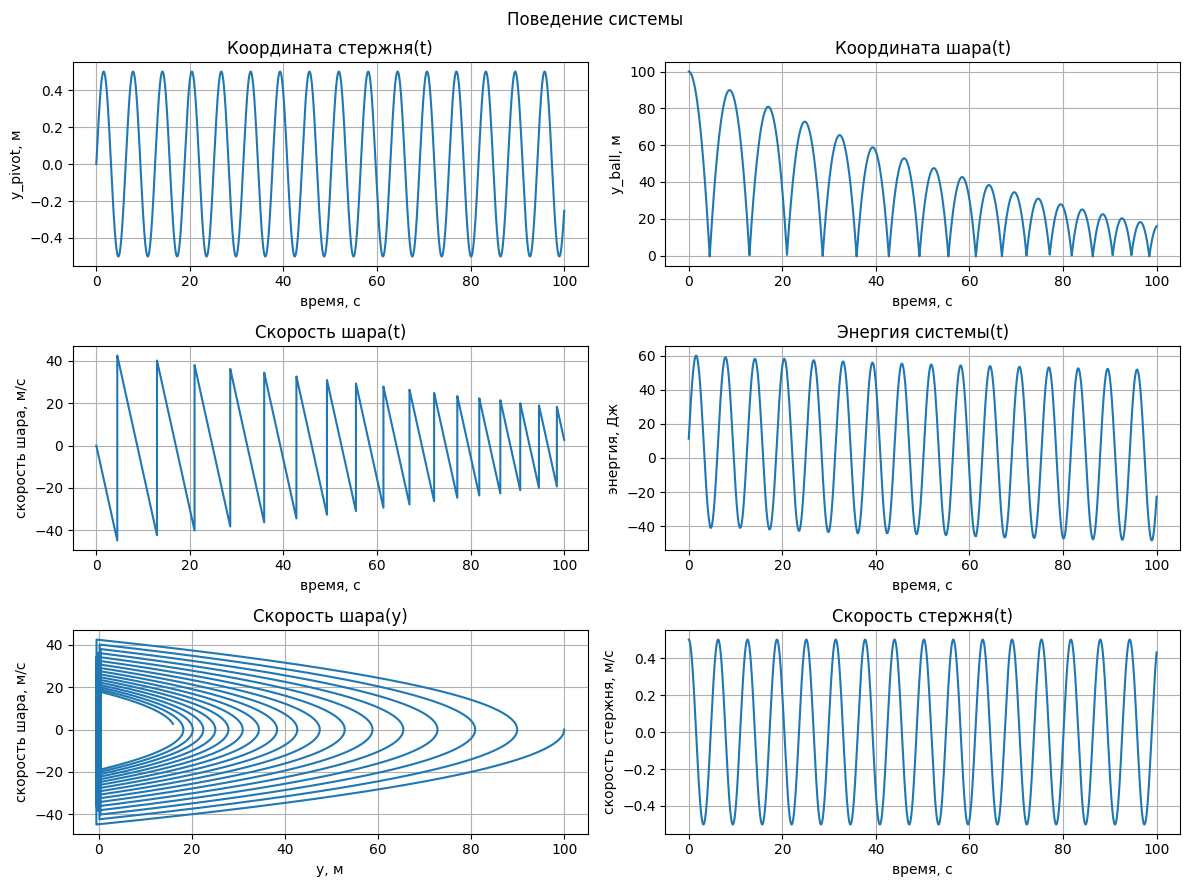

In [484]:
d = 20
t, y_piv, vel, y_b, v_b, e = model_system(H, H - d, 10, 0.5, 1, 0, 100, 1e-3)
show_model(t, y_piv, vel, y_b, v_b, e)

Сейчас разобрали случай, когда сила тяжести создается и Землей, и стержнем.

    1. энергия осциллирует (из-за потерь горбики смещаются вниз)
    2. график скорости зигзагообразен - меняется скорость при столкновении, дальше она уменьшается из-за g
    3. шарик колеблется (но все меньше и меньше)
    4. графики со стержнем построила на всякий случай
    5. фазовый график с практически замкнутыми линиями - посмотрим, что происходит без потерь энергии
    6. первое допущение, т.к. M >> m - принимаем, что после столкновения с шариком скорость стержня не меняется
    7. второе допущение, расчет координат, как при равномерном движении
    8. третье допущение, расчет времени - если сделать вывод массива, то там периодически встречаются ошибки в пару тысячных

-> Начальное положение шара: 100 м, начальное положение стержня: 80 м
-> Временной промежуток от 0 до 100 секунд с шагом 0.001 секунд
-> g = 10 м / c ^ 2, масса стержня: 10 кг, а шарика - 0.01 кг
-> Доля потерянной энергии: 0
--> Количество столкновений: 11


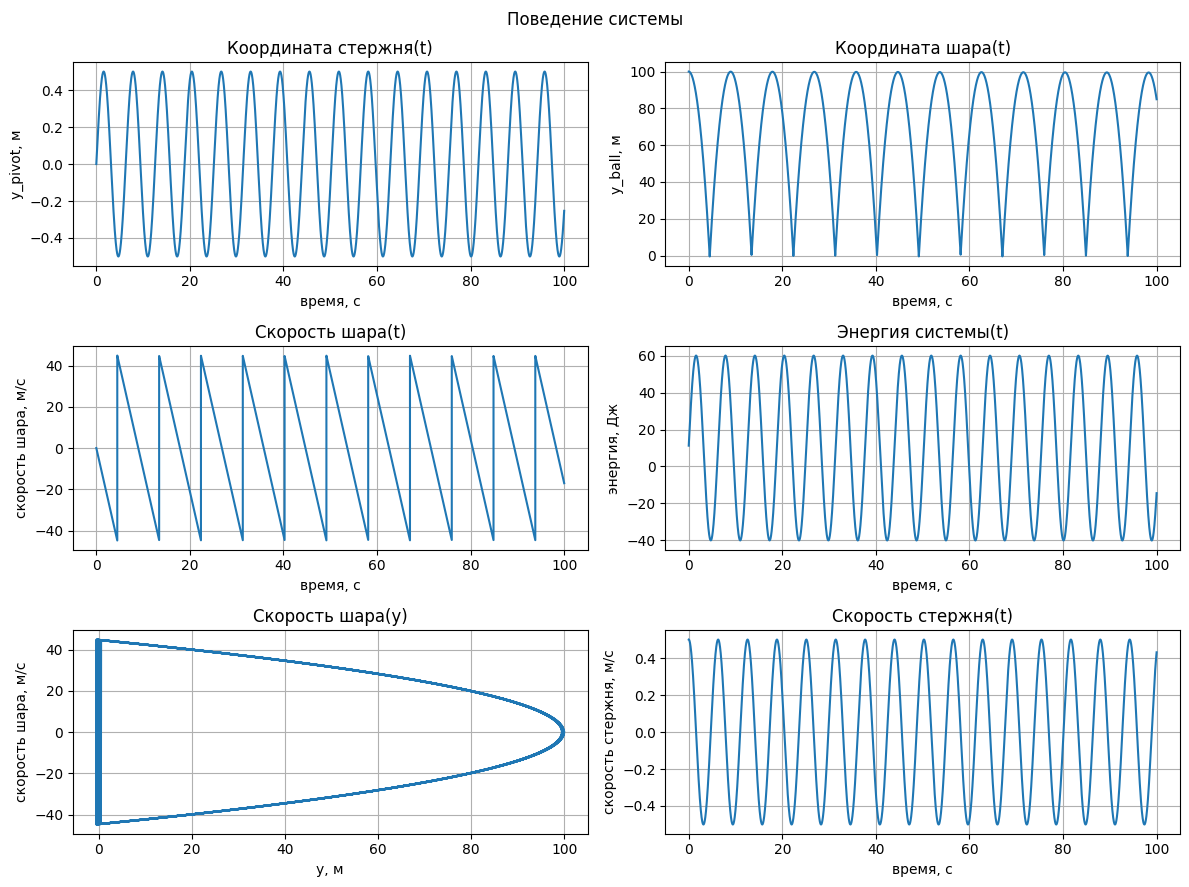

In [485]:
d = 20
t, y_piv, vel, y_b, v_b, e = model_system(H, H - d, 10, 0.5, 1, 0, 100, 1e-3, coef=0)
show_model(t, y_piv, vel, y_b, v_b, e)

Без потерь энергии фазовый график замкнутый, и, примерно все осциллирует.

-> Начальное положение шара: 100 м, начальное положение стержня: 80 м
-> Временной промежуток от 0 до 1000 секунд с шагом 0.001 секунд
-> g = 10 м / c ^ 2, масса стержня: 10 кг, а шарика - 0.01 кг
-> Доля потерянной энергии: 0
--> Количество столкновений: 113


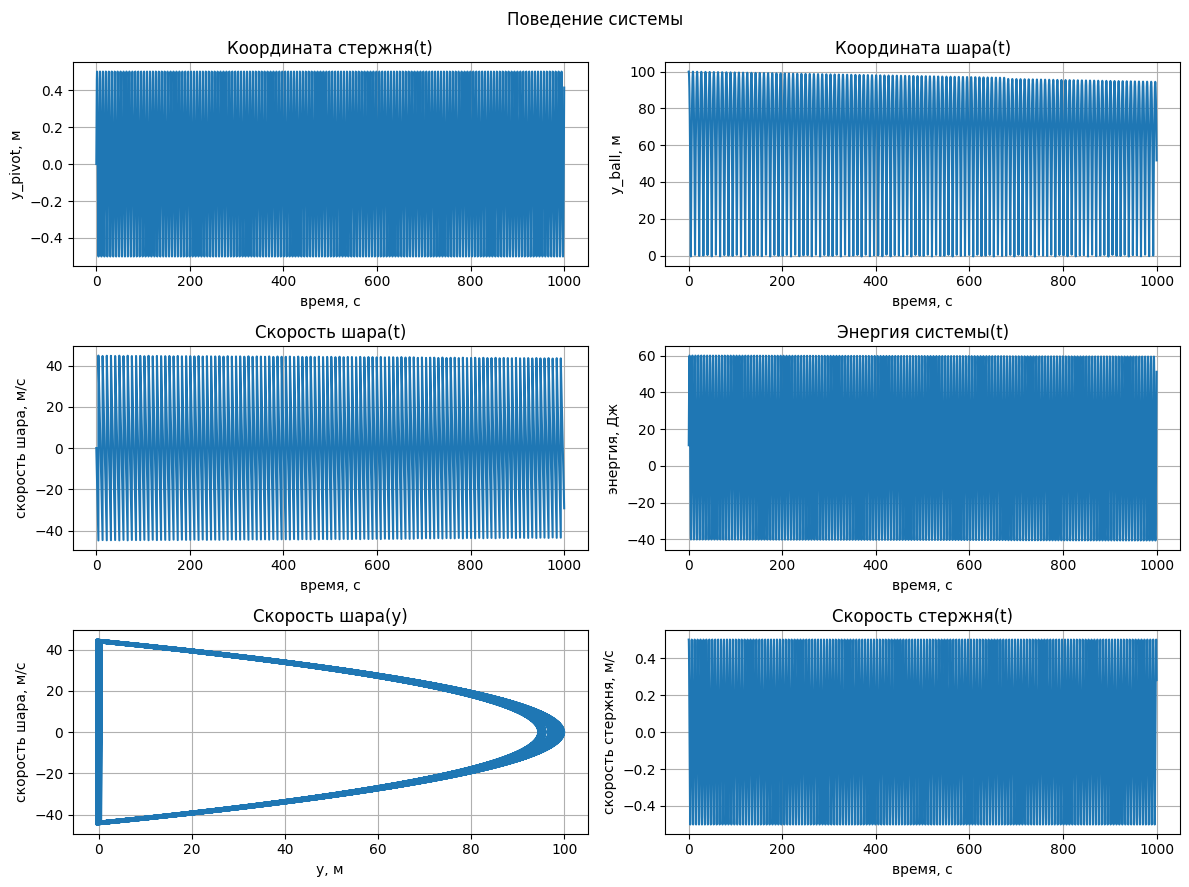

In [486]:
d = 20
t, y_piv, vel, y_b, v_b, e = model_system(H, H - d, 10, 0.5, 1, 0, 1000, 1e-3, coef=0)
show_model(t, y_piv, vel, y_b, v_b, e)

Не слишком информативные графики, но на них видны численнык ошибки. В фазовом портрете наслоение линий, хотя должен быть 1 контур. Координата шара тоже плывет => есть ошибка и в энергии

Ответы на вопросы:
1. Максимальная высота зависит от характера движения стержня (частоты, начальной фазы и амплитуды) и a. При a = 0 (если нет потерь энергии)
2. При a = 0 (если нет потерь энергии), численая ошибка - проявляются такие зубцы на фазовом графике. Способы поправить: уменьшить шаг dt, продвинутая аппроксимация (т.е. обрабатывать не как равномерное движение, а как равноускоренное).
3. Она осциллирует. Ошибка потенциально в арифметике - в округлениях, например. Способы улучшения обозначила в пункте 2

